# Introduction to Job Suggestion based on Skills



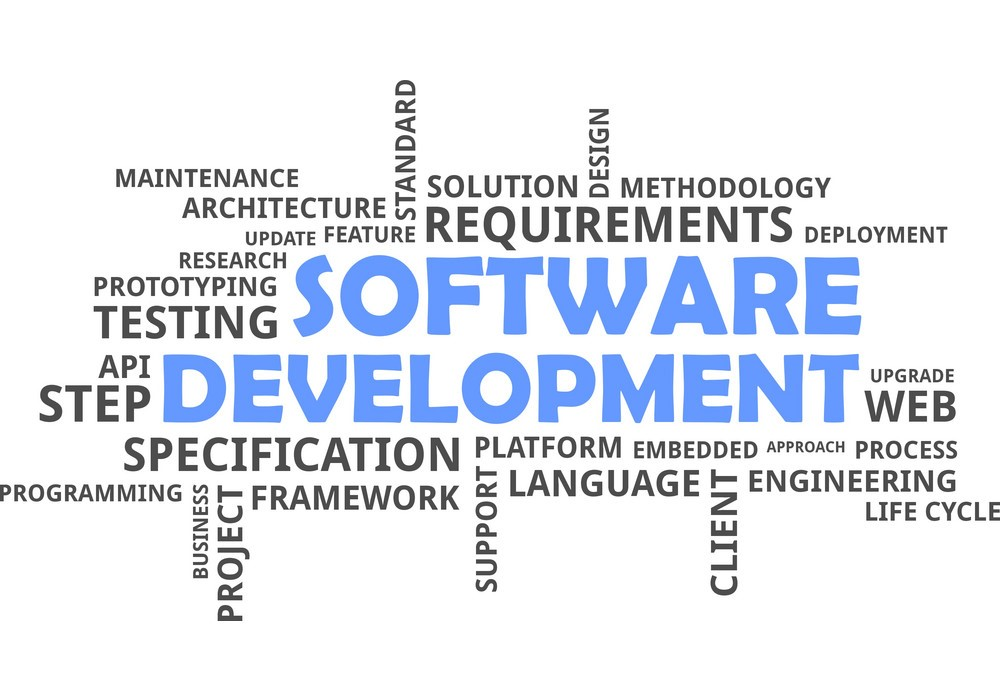


For the Job Domain Suggestion based on Skills, we will be working on The Indeed Software engineer Job dataset from Kaggle. 


The dataset is comprised of tab-separated files with phrases from the Indeed Software engineer Job dataset. Each Job has a Job Requirement.

Below is the step by step methodology that we will be following :

- <a href='#1'>1. Initial Look at the Data</a>
    - <a href='#1.1'>1.1 Dropping insignificant columns</a>
    - <a href='#1.2'>1.2 Overall Distribution of the length of the job summary under each job title</a>


  - <a href='#2.1'>2.1 Feature Engineering</a>
    - <a href='#2.2'>2.2 Implementation of CountVectorizer & TF-IDF

    - <a href='#2.3'>2.3 Model Training, Prediction and Performance Evaluation</a>
        - <a href='#2.3.1'>2.3.1 Logistic Regression model on CountVectorizer</a>
        - <a href='#2.3.2'>2.3.2 Logistic Regression model on TF-IDF features</a>
        - <a href='#2.3.3'>2.3.3 SGD model on Countvectorizer</a>
        - <a href='#2.3.4'>2.3.4 SGD model on TF-IDF</a>
        - <a href='#2.3.5'>2.3.5 RandomForest model on TF-IDF</a>
        - <a href='#2.3.6'>2.3.6 RandomForest model on Count Vectorizer</a>
        - <a href='#2.3.7'>2.3.7 K Neareast Neighbor model on TF-IDF</a>
        - <a href='#2.3.8'>2.3.8 K Neareast Neighbor model on Count Vectorizer</a>
    - <a href='#3.1'>3.1 Prediction using knn</a>
    - <a href='#3.2'>3.2 Prediction using Logistic Regression</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## <a id='1'>1. Initial Look at the Data</a>

In [2]:
df_train = pd.read_csv("C:\\Users\\shivam\\Desktop\\IDA project\\archive\\Indeed_10k.csv")
df_train.head()

,Unnamed: 0,Name,Company,City,Ratings,Summary,Date
0,0,Entry level Software Engineer,CapitalPlanHoldings,"San Francisco, CA",NaN,"Programming experience using C#, C++, or Java ...",2 days ago
1,1,Junior Software Engineer,FormSwift,"San Francisco, CA",NaN,Building new product features across the back ...,30+ days ago
2,2,Software Engineer,Microsoft,"San Francisco, CA",4.2,Yammer-THE social network for workplace-is hir...,5 days ago
3,3,Software Engineer - Entry Level,Pathrise,"San Francisco Bay Area, CA",NaN,You'll be expected to deliver in an agile envi...,2 days ago
4,4,Software Engineer (Python),Imgix,"San Francisco, CA",NaN,Comfortable developing in Python (or similar)....,5 days ago


## <a id='1.1'>1.1 Dropping insignificant columns</a>

In [3]:
df_train_1 = df_train.drop(['Unnamed: 0', 'Company', 'City', 'Ratings', 'Date'],axis=1)
df_train_1.head()

,Name,Summary
0,Entry level Software Engineer,"Programming experience using C#, C++, or Java ..."
1,Junior Software Engineer,Building new product features across the back ...
2,Software Engineer,Yammer-THE social network for workplace-is hir...
3,Software Engineer - Entry Level,You'll be expected to deliver in an agile envi...
4,Software Engineer (Python),Comfortable developing in Python (or similar)....


In [4]:
df_train_1.Name.value_counts()

Name
Software Engineer                                            542
Senior Software Engineer                                     479
Online Marketing Associate - 2020 Graduate                   336
iOS Engineer                                                 315
Staff Software Engineer                                      241
                                                            ... 
UI Software Engineer                                           1
Software Engineer - iOS Infrastructure                         1
Software Engineer - Replay Simulation                          1
Software Engineer, Mobile Applications - Connected Worker      1
Entry level Software Engineer                                  1
Name: count, Length: 562, dtype: int64

In [5]:
count_freq = dict(df_train_1['Name'].value_counts())

In [6]:
df_train_1['count_freq'] = df_train_1['Name']


In [7]:
df_train_1

,Name,Summary,count_freq
0,Entry level Software Engineer,"Programming experience using C#, C++, or Java ...",Entry level Software Engineer
1,Junior Software Engineer,Building new product features across the back ...,Junior Software Engineer
2,Software Engineer,Yammer-THE social network for workplace-is hir...,Software Engineer
3,Software Engineer - Entry Level,You'll be expected to deliver in an agile envi...,Software Engineer - Entry Level
4,Software Engineer (Python),Comfortable developing in Python (or similar)....,Software Engineer (Python)
...,...,...,...
9995,Principal Software Engineer,"Experience in JavaScript, and one or more prog...",Principal Software Engineer
9996,Full-stack Engineer,Catered lunches: we have high-quality catered ...,Full-stack Engineer
9997,Software Engineer - Revenue Data Platform (Rev...,Previous experience with cloud server environm...,Software Engineer - Revenue Data Platform (Rev...
9998,"Frontend Engineer, Identity",Help turn our vision into a tangible roadmap e...,"Frontend Engineer, Identity"


In [8]:
df_train_1['count_freq'] = df_train_1['count_freq'].map(count_freq)


# **Finding unique titles**

In [9]:
df_train_1.Name.nunique()

562

# Considering only those Job Titles having frequency greater than 200

In [10]:
df_train_2=df_train_1[df_train_1.count_freq>200]

# Total Job Titles having more than 200 frequency , these all titles become Classes for prediction.

In [11]:
df_train_2.Name.nunique()

16

In [12]:
df_train_1['phrase_len'] = [len(t) for t in df_train_1.Summary]
df_train_1.head(4)

,Name,Summary,count_freq,phrase_len
0,Entry level Software Engineer,"Programming experience using C#, C++, or Java ...",1,158
1,Junior Software Engineer,Building new product features across the back ...,2,131
2,Software Engineer,Yammer-THE social network for workplace-is hir...,542,160
3,Software Engineer - Entry Level,You'll be expected to deliver in an agile envi...,1,145


## <a id='1.2'>1.2 Overall Distribution of the length of the Job Summary under each Job title</a>

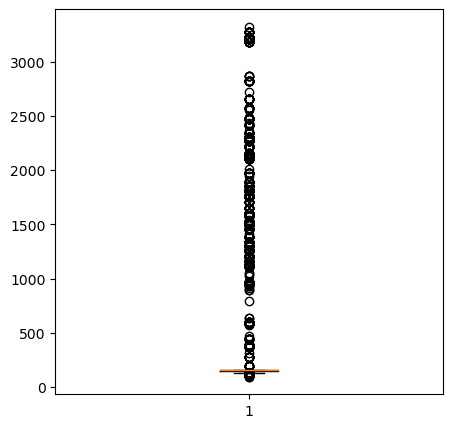

In [13]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(df_train_1.phrase_len)
plt.show()

In [14]:
df_train_1[df_train_1.phrase_len > 500].head()

,Name,Summary,count_freq,phrase_len
130,Software Engineer,Prior working experience in Java web applicati...,542,3224
131,"Software Engineer, Frontend - University Graduate","Familiarity with REST APIs, ability to read py...",2,1576
132,Software Engineer,"Net, MVC, MS SQL, Microsoft Azure, JQuery, CSS...",542,1896
133,Associate Gameplay Engineer,"Scripting languages (Lua, Python, Perl).Work w...",2,2363
134,Machine Learning Software Engineer,Backend development experience with a strong i...,2,2723


## <a id='2.1'>2.1 Feature Engineering</a>

In [15]:
summary = np.array(df_train_1['Summary'])
name = np.array(df_train_1['Name'])
# build train and test datasets

from sklearn.model_selection import train_test_split    
summary_train, summary_test, name_train, name_test = train_test_split(summary, name, test_size=0.3, random_state=4)

In [16]:
df_train_1.Name.unique()

array(['Entry level Software Engineer', 'Junior Software Engineer',
       'Software Engineer', 'Software Engineer - Entry Level',
       'Software Engineer (Python)', 'SOFTWARE ENGINEER',
       "AppD Software Engineer Bachelor's (Intern) United States",
       'Software Engineer - University Graduate',
       'Entry Level DevOps Engineer', 'Software Engineer- Capacity',
       'Software Engineer, Videos', 'Intern, Software Engineering',
       'Software Engineering Intern', 'Junior Developer',
       'New Graduate: Software Engineering', 'Junior Full Stack Engineer',
       'Software Engineer, Square Capital',
       'Internship: Social - Software Engineer Summer Intern',
       'Summer 2020 Intern - Software Engineer',
       'Software Engineer - Subscriptions',
       'Software Development Engineer II #0000',
       'Software Development Engineer',
       'Entry Level Accenture Technology Software Engineer Associate',
       'Software Engineer Internship',
       'Software Engineer

## Setting the parameters of CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build Bag-Of-Words on train data
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(summary_train).toarray()
print(cv_train_features)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:

# build TFIDF features on train data 
#no of times a word appears in a doc to no of  doc word appears in
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(summary_train)



In [19]:
# transform test data into features
cv_test_features = cv.transform(summary_test).toarray()
tv_test_features = tv.transform(summary_test)


## <a id='2.3'>2.3 Model Training, Prediction and Performance Evaluation</a>

In [20]:
####Evaluation metrics


from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    



    

    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                 classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)








In [21]:
from sklearn.linear_model import SGDClassifier, LogisticRegression


lr = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000, C=10)
sgd = SGDClassifier(loss='hinge', max_iter=1000)


In [22]:
def scores(true,predicted):
    f1=f1_score(true,predicted,average='weighted')
    print("f1 score:",f1)
    precision=precision_score(true,predicted,average='weighted')
    print("precision score:",precision)
    recall=recall_score(true,predicted,average='weighted')
    print("recall score:",recall)
    accuracy=accuracy_score(true,predicted)
    print("accuracy score:",accuracy)

## <a id='2.3.1'>2.3.1 Logistic Regression model on CountVectorizer</a>

In [23]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score


In [24]:
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=name_train,
                                             test_features=cv_test_features, test_labels=name_test)
scores(name_test,lr_bow_predictions)

f1 score: 0.9254939596181981
precision score: 0.9150738515211736
recall score: 0.9413333333333334
accuracy score: 0.9413333333333334


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <a id='2.3.2'>2.3.2 Logistic Regression model on TF-IDF features</a>


In [25]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=name_train,
                                               test_features=tv_test_features, test_labels=name_test)
scores(name_test,lr_tfidf_predictions)

f1 score: 0.926642508519781
precision score: 0.9200744174016275
recall score: 0.9416666666666667
accuracy score: 0.9416666666666667


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



## <a id='2.3.3'>2.3.3 Stochiastic Gradient Descent model on Countvectorizer</a>

In [26]:
# SGD model on Countvectorizer
sgd_bow_predictions = train_predict_model(classifier=sgd, 
                                             train_features=cv_train_features, train_labels=name_train,
                                             test_features=cv_test_features, test_labels=name_test)
scores(name_test,sgd_bow_predictions)

f1 score: 0.9252921603636994
precision score: 0.9189350339454998
recall score: 0.938
accuracy score: 0.938


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <a id='2.3.4'>2.3.4 Stochiastic Gradient Descent model on TF-IDF</a>

In [27]:
# SGD model on TF-IDF
sgd_tfidf_predictions = train_predict_model(classifier=sgd, 
                                                train_features=tv_train_features, train_labels=name_train,
                                                test_features=tv_test_features, test_labels=name_test)
scores(name_test,sgd_tfidf_predictions)

f1 score: 0.9290576992171764
precision score: 0.921688784467697
recall score: 0.9403333333333334
accuracy score: 0.9403333333333334


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random tests here 

In [28]:

#plot_model_roc_curve(sgd, sgd_tfidf_predictions, name_train, label_encoder=None, class_names=None)

In [29]:
#plot_model_decision_surface(sgd,name_test, sgd_bow_predictions)

## <a id='2.3.5'>2.3.5 RandomForest model on TF-IDF</a>

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

In [31]:
# RandomForest model on TF-IDF
rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                                train_features=tv_train_features, train_labels=name_train,
                                                test_features=tv_test_features, test_labels=name_test)
scores(name_test,rfc_tfidf_predictions)

f1 score: 0.925431481780712
precision score: 0.9181113573669702
recall score: 0.941
accuracy score: 0.941


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <a id='2.3.6'>2.3.6 RandomForest model on CountVectorizer</a>

In [32]:
rfc_bow_predictions = train_predict_model(classifier=sgd, 
                                             train_features=cv_train_features, train_labels=name_train,
                                             test_features=cv_test_features, test_labels=name_test)
scores(name_test,rfc_bow_predictions)

f1 score: 0.9287471709712
precision score: 0.9229601702472033
recall score: 0.9403333333333334
accuracy score: 0.9403333333333334


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <a id='2.3.7'>2.3.7 K Neareast Neighbour model on TF-IDF</a>

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [34]:

knn_tfidf_predictions = train_predict_model(classifier=neigh, 
                                               train_features=tv_train_features, train_labels=name_train,
                                               test_features=tv_test_features, test_labels=name_test)
scores(name_test,knn_tfidf_predictions)

f1 score: 0.9119973882202662
precision score: 0.9048345312708603
recall score: 0.9223333333333333
accuracy score: 0.9223333333333333


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.

## <a id='2.3.8'>2.3.8 K Neareast Neighbour model on CountVectorizer</a>

In [35]:
knn_bow_predictions = train_predict_model(classifier=sgd, 
                                             train_features=cv_train_features, train_labels=name_train,
                                             test_features=cv_test_features, test_labels=name_test)
scores(name_test,knn_bow_predictions)

f1 score: 0.9275259373252163
precision score: 0.9217331457027655
recall score: 0.9393333333333334
accuracy score: 0.9393333333333334


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Logistic Regression on TF-IDF is outperforming other machine learning algorithms**. 



In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build Bag-Of-Words on train data
cv1 = CountVectorizer(stop_words='english',max_features=10000)
cv1_train_features = cv1.fit(summary_train)

 ## <a id='3.1'>3.1 Prediction using KNN</a>

In [37]:
#cv1 = CountVectorizer()
x_traincv = tv.transform(["You are a strong technical advocate with a background in  C++,  Scala, and Python.You are knowledgeable in one or more of the following: machine…"])

In [38]:
x_traincv
a=neigh.predict(x_traincv) 
print(a)

['Machine Learning Engineer - Health ML']


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 ## <a id='3.2'>3.2 Prediction using Logistic Regression By taking input from user.

In [39]:
def pred(skill,n):
    x1_traincv = tv.transform([skill])
    a1=lr.predict_proba(x1_traincv) 
    l1=list(a1)
    l1=list(l1[0])
    lr.classes_
    l2=list(lr.classes_)
    l2=list(l2)
    res = dict(zip(l1, l2))
    myKeys = list(res.keys())
    myKeys.sort(reverse=True)
    sorted_dict = {i: res[i] for i in myKeys}
    return list(sorted_dict.values())[:n]
skill=input("Enter your skills")
n=int(input("Enter number of domain for suggestion"))    
pred(skill,n)

Enter your skillsjava
Enter number of domain for suggestion5


['Software Engineer',
 'Staff Software Engineer',
 'Java Software Engineer',
 'Android Engineer',
 'Software Development Engineer in Test']

# Web Interface

In [40]:
import gradio as gr

def abc(Skills, Total_domains):
    b=pred(Skills,Total_domains)

    return b

demo = gr.Interface(
    fn=abc,
    inputs=["text", "number"],
    outputs="text"
)

demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
